In [32]:
import numpy as np
import pandas as pd

In this notebook, I convert the results of my algorithm for 15 routes into a list of paths (i.e. commutes), which represent possible uses of the bus for riders (point A to Point B, Point A to Point C, etc). Then, I compare the list of paths at the starting point (first quarter measured) and end point (final quarter measured) to gain a quantitative measure of how much the route changed over time. In the final section, I use the same method to compare the results of two versions of the algorithm -- one that optimizes for total rides along each route and the other that optimizes for total fare cost.

Below is sample code to calculate the intersection of two lists of Tuples. I'll use it later when I've created the lists of tuples that represent the routes traveled in the first and last version of algorithm-planned route.

In [33]:
# Python3 code to demonstrate working of
# Intersection in Tuple Records Data
# Using list comprehension
 
# Initializing lists
test_list1 = [(1,2),(1,4),(2,7)]
test_list2 = [(1,2),(1,3),(1,4)]
 
# printing original lists
print("The original list 1 is : " + str(test_list1))
print("The original list 2 is : " + str(test_list2))
 
# Intersection in Tuple Records Data
# Using list comprehension
res = [ele1 for ele1 in test_list1
       for ele2 in test_list2 if ele1 == ele2]
 
# printing result

intersection_pct = len(res)/len(test_list1)
print(res)
print(intersection_pct)

The original list 1 is : [(1, 2), (1, 4), (2, 7)]
The original list 2 is : [(1, 2), (1, 3), (1, 4)]
[(1, 2), (1, 4)]
0.6666666666666666


Reading in the results of running the algorithm on 15 routes, weighted by # of trips in which the bus route would make redundant.

In [34]:
routes_by_trips = pd.read_csv(r"C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\15routes_byquarter_bytrips.csv")

In [35]:
routes_by_trips.head(20)

,Order,PathIDs,Weight_of_path,Quarter,Route
0,0,14.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
1,1,228.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
2,2,181.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
3,3,189.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
4,4,61.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
5,5,35.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
6,6,76.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
7,7,72.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
8,8,39.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
9,9,155.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach


In [36]:
#code to pull a list of paths for the first quarter and the final quarter of the analysis.
routes = routes_by_trips['Route'].unique() #unique routes
quarters = routes_by_trips['Quarter'].unique() #unique quarters
path_lists_firstQ = []
path_lists_lastQ = []
quarter_list = []

for n in range(len(routes)): #for all routes
    new_route = routes_by_trips.loc[(routes_by_trips['Route'] == routes[n])&(routes_by_trips['Quarter'] == quarters[0])] #pull the df for the first quarter
    path_list = new_route['PathIDs'].tolist() #pull the paths and make it a list
    path_lists_firstQ.append(path_list) #append that list to a list of path lists for the first Q
    new_route = routes_by_trips.loc[(routes_by_trips['Route'] == routes[n])&(routes_by_trips['Quarter'] == quarters[len(quarters)-1])] #pull the df for the last quarter
    path_list = new_route['PathIDs'].tolist() #pull the paths and make it a list
    path_lists_lastQ.append(path_list) #append that list to a list of path lists for the last Q


In [37]:
print(routes[1],quarters[0],path_lists_firstQ[1]) #check to make sure it worked for the first quarter of analysis

Bay_Ridge_to_Sheepshead_Bay 2017-Q3 [14.0, 228.0, 257.0, 89.0, 188.0, 71.0, 72.0, 91.0, 149.0, 210.0]


In [38]:
print(routes[1],quarters[len(quarters)-1],path_lists_lastQ[1])  #check to make sure it worked for the final quarter of analysis

Bay_Ridge_to_Sheepshead_Bay 2023-Q1 [14.0, 228.0, 227.0, 26.0, 89.0, 188.0, 71.0, 91.0, 149.0, 210.0]


In [39]:
#this is turning the list of paths into a list of tuples so [1,2,3] becomes [(1,2),(1,3),(2,3)]
#goal is to compare paths the bus takes as it would be valued by the consumer who could potentially need to go from any of those point As to point Bs
first_q_covered_routes = []
path_combo_list = []


for n in range(len(path_lists_firstQ)): #for all lists of paths
    path_combinations = [] #empty list
    for i in range(len(path_lists_firstQ[n])): #for all members of the list we're looping through
        for j in range(i + 1, len(path_lists_firstQ[n])): #for the range between the member of the list +1
            path_combinations.append((path_lists_firstQ[n][i],path_lists_firstQ[n][j])) #append a tuple of member and later members
    first_q_covered_routes.append(path_combinations) #append that list of tuples onto a list of lists

In [40]:
first_q_covered_routes[1] #appears to work! 

[(14.0, 228.0),
 (14.0, 257.0),
 (14.0, 89.0),
 (14.0, 188.0),
 (14.0, 71.0),
 (14.0, 72.0),
 (14.0, 91.0),
 (14.0, 149.0),
 (14.0, 210.0),
 (228.0, 257.0),
 (228.0, 89.0),
 (228.0, 188.0),
 (228.0, 71.0),
 (228.0, 72.0),
 (228.0, 91.0),
 (228.0, 149.0),
 (228.0, 210.0),
 (257.0, 89.0),
 (257.0, 188.0),
 (257.0, 71.0),
 (257.0, 72.0),
 (257.0, 91.0),
 (257.0, 149.0),
 (257.0, 210.0),
 (89.0, 188.0),
 (89.0, 71.0),
 (89.0, 72.0),
 (89.0, 91.0),
 (89.0, 149.0),
 (89.0, 210.0),
 (188.0, 71.0),
 (188.0, 72.0),
 (188.0, 91.0),
 (188.0, 149.0),
 (188.0, 210.0),
 (71.0, 72.0),
 (71.0, 91.0),
 (71.0, 149.0),
 (71.0, 210.0),
 (72.0, 91.0),
 (72.0, 149.0),
 (72.0, 210.0),
 (91.0, 149.0),
 (91.0, 210.0),
 (149.0, 210.0)]

In [41]:
#same as above but for the last route
last_q_covered_routes = []
path_combo_list = []


for n in range(len(path_lists_lastQ)):
    path_combinations = []
    for i in range(len(path_lists_lastQ[n])):
        for j in range(i + 1, len(path_lists_lastQ[n])):
            path_combinations.append((path_lists_lastQ[n][i],path_lists_lastQ[n][j]))
    last_q_covered_routes.append(path_combinations)

Now I have my list of paths/commutes for the first and last route measured. I can find the difference between these two lists.

In [42]:
#this code gives you the percentage of tuples in the final version of the route that match the tuples in the first route
intersection_pcts = []
for n in range(len(routes)): #for all routes
    start_route = first_q_covered_routes[n] #list of tuples in first quarter's route
    end_route = last_q_covered_routes[n] #list of tuples in final quarter's route
    res = [ele1 for ele1 in start_route
        for ele2 in end_route if ele1 == ele2] #list of tuples that intersect between start route and end route
    intersection_pct = len(res)/len(start_route) # of tuples in the intersection / # of tuples in the original
    intersection_pcts.append(intersection_pct) #append the intersection to a blank list

In [43]:
intersection_pcts

[1.0,
 0.6222222222222222,
 1.0,
 0.14285714285714285,
 0.9555555555555556,
 1.0,
 1.0,
 0.5454545454545454,
 0.8,
 0.4666666666666667,
 0.5833333333333334,
 0.9722222222222222,
 0.9615384615384616,
 1.0,
 1.0]

Finally, turning this into a dataframe of routes and percentage change.

In [44]:
weighted_by_trip_pct_change = pd.DataFrame({'routes': routes, 'dif_trip_weighting_2017_Q3':intersection_pcts}) #dataframe of routes and percentage of intersection of tuples
weighted_by_trip_pct_change

,routes,dif_trip_weighting_2017_Q3
0,Bay_Ridge_to_Manhattan_Beach,1.000000
1,Bay_Ridge_to_Sheepshead_Bay,0.622222
2,Gravesend_to_Canarsie,1.000000
3,Midwood_to_Sunset_Park,0.142857
4,Downtown_Brooklyn_to_Ridgewood,0.955556
5,Williamsburg_to_Lower_East_Side,1.000000
6,Prospect_Lefferts_Garden_to_Bergen_Beach,1.000000
7,Downtown_Brooklyn_to_Kings_Plaza,0.545455
8,Greenpoint_to_Prospect_Lefferts_Garden,0.800000
9,Bed_Stuy_to_Sheepshead_Bay,0.466667


The above involves the algorithm weighted by total number of trips. Below, I'm literally doing the exact same thing, but weighting by fares.

In [45]:
routes_by_fares = pd.read_csv(r"C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\15routes_byquarter_bycost.csv")

In [46]:
routes = routes_by_fares['Route'].unique()
quarters = routes_by_fares['Quarter'].unique()
path_lists_firstQ = []
path_lists_lastQ = []
quarter_list = []

for n in range(len(routes)):
    new_route = routes_by_fares.loc[(routes_by_fares['Route'] == routes[n])&(routes_by_fares['Quarter'] == quarters[0])]
    path_list = new_route['PathIDs'].tolist()
    path_lists_firstQ.append(path_list)
    new_route = routes_by_fares.loc[(routes_by_fares['Route'] == routes[n])&(routes_by_fares['Quarter'] == quarters[len(quarters)-1])]
    path_list = new_route['PathIDs'].tolist()
    path_lists_lastQ.append(path_list)


In [47]:
first_q_covered_routes = []
path_combo_list = []


for n in range(len(path_lists_firstQ)):
    path_combinations = []
    for i in range(len(path_lists_firstQ[n])):
        for j in range(i + 1, len(path_lists_firstQ[n])):
            path_combinations.append((path_lists_firstQ[n][i],path_lists_firstQ[n][j]))
    first_q_covered_routes.append(path_combinations)

In [48]:
last_q_covered_routes = []
path_combo_list = []


for n in range(len(path_lists_lastQ)):
    path_combinations = []
    for i in range(len(path_lists_lastQ[n])):
        for j in range(i + 1, len(path_lists_lastQ[n])):
            path_combinations.append((path_lists_lastQ[n][i],path_lists_lastQ[n][j]))
    last_q_covered_routes.append(path_combinations)

In [49]:
intersection_pcts = []
for n in range(len(routes)):
    start_route = first_q_covered_routes[n]
    end_route = last_q_covered_routes[n]
    res = [ele1 for ele1 in start_route
        for ele2 in end_route if ele1 == ele2]
    intersection_pct = len(res)/len(start_route)
    intersection_pcts.append(intersection_pct)

In [50]:
weighted_by_fare_pct_change = pd.DataFrame({'routes': routes, 'dif_fare_weighting_2019_Q1':intersection_pcts})
weighted_by_fare_pct_change

,routes,dif_fare_weighting_2019_Q1
0,Bay_Ridge_to_Manhattan_Beach,1.000000
1,Bay_Ridge_to_Sheepshead_Bay,0.800000
2,Gravesend_to_Canarsie,1.000000
3,Midwood_to_Sunset_Park,0.285714
4,Downtown_Brooklyn_to_Ridgewood,0.977778
5,Williamsburg_to_Lower_East_Side,1.000000
6,Prospect_Lefferts_Garden_to_Bergen_Beach,1.000000
7,Downtown_Brooklyn_to_Kings_Plaza,0.984848
8,Greenpoint_to_Prospect_Lefferts_Garden,1.000000
9,Bed_Stuy_to_Sheepshead_Bay,1.000000


Merging the three dataframes so I get all the weights together.

In [51]:
final_results = pd.merge(weighted_by_trip_pct_change,weighted_by_fare_pct_change, on='routes', how='inner')
final_results

,routes,dif_trip_weighting_2017_Q3,dif_fare_weighting_2019_Q1
0,Bay_Ridge_to_Manhattan_Beach,1.000000,1.000000
1,Bay_Ridge_to_Sheepshead_Bay,0.622222,0.800000
2,Gravesend_to_Canarsie,1.000000,1.000000
3,Midwood_to_Sunset_Park,0.142857,0.285714
4,Downtown_Brooklyn_to_Ridgewood,0.955556,0.977778
5,Williamsburg_to_Lower_East_Side,1.000000,1.000000
6,Prospect_Lefferts_Garden_to_Bergen_Beach,1.000000,1.000000
7,Downtown_Brooklyn_to_Kings_Plaza,0.545455,0.984848
8,Greenpoint_to_Prospect_Lefferts_Garden,0.800000,1.000000
9,Bed_Stuy_to_Sheepshead_Bay,0.466667,1.000000


Conclusions: I checked my scores against notes I took by looking at each route on Tableau. The score is a reasonably good way to evaluate how much routes change over time. It does sometimes not reflect the pattern over time e.g., the final route may be quite different from the first quarter route, but in most other quarters, including recent ones, the routes were the same. This is more a reflection of similar routes being neck and neck than legitimate change in traffic patterns. 

In general, traffic routes are more stable than I would have thought.

Weighting by fare provides a more stable route over time.

I'm going to make this into a function then loop through for every quarter and graph the route change over time. Also, the above  compares the first quarter to the final quarter but I'd like to compare to see how the route changes decays over time so I'm going to compare the 'current q' being measured to the final quarter.

In [52]:
def route_change_over_time(quarter,routes_df):  

    routes = routes_df['Route'].unique()
    quarters = routes_df['Quarter'].unique()
    path_lists_currentQ = []
    path_lists_firstQ = []
    quarter_list = []

#pulling route lists from the dataframe
    for n in range(len(routes)):
        new_route = routes_df.loc[(routes_df['Route'] == routes[n])&(routes_df['Quarter'] == quarter)] #pulling the route for the quarter given in the funtion for every route
        path_list = new_route['PathIDs'].tolist() #turning into a list
        path_lists_currentQ.append(path_list) #appending to a list of lists
        new_route = routes_df.loc[(routes_df['Route'] == routes[n])&(routes_df['Quarter'] == quarters[0])] #pulling the route for the first quarter pulled for every route 
        path_list = new_route['PathIDs'].tolist() #turning into a list
        path_lists_firstQ.append(path_list)#appending to a list of lists

    current_q_covered_routes = []
    path_combo_list = []


#below snippet converts the 'current Q' to a list of paths/commutes
    for n in range(len(path_lists_currentQ)):
        path_combinations = []
        for i in range(len(path_lists_currentQ[n])):
            for j in range(i + 1, len(path_lists_currentQ[n])):
                path_combinations.append((path_lists_currentQ[n][i],path_lists_currentQ[n][j]))
        current_q_covered_routes.append(path_combinations)

    first_q_covered_routes = []
    path_combo_list = []

#below snippet converts the 'first Q' to a list of paths/commutes
    for n in range(len(path_lists_firstQ)):
        path_combinations = []
        for i in range(len(path_lists_firstQ[n])):
            for j in range(i + 1, len(path_lists_firstQ[n])):
                path_combinations.append((path_lists_firstQ[n][i],path_lists_firstQ[n][j]))
        first_q_covered_routes.append(path_combinations)

#below snippet compares how many paths are in the current Q being measured compared to the first Q
    intersection_pcts = []
    for n in range(len(routes)):
        start_route = first_q_covered_routes[n]
        end_route = current_q_covered_routes[n]
        res = [ele1 for ele1 in start_route
            for ele2 in end_route if ele1 == ele2]
        intersection_pct = len(res)/len(start_route)
        intersection_pcts.append(intersection_pct)

    route_change_over_time_DF = pd.DataFrame({'routes': routes, quarter:intersection_pcts})
    return route_change_over_time_DF

In [53]:
routes_df_by_trip = pd.read_csv(r"C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\15routes_byquarter_bytrips.csv")
routes_df_by_trip

,Order,PathIDs,Weight_of_path,Quarter,Route
0,0,14.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
1,1,228.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
2,2,181.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
3,3,189.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
4,4,61.0,160108,2017-Q3,Bay_Ridge_to_Manhattan_Beach
...,...,...,...,...,...
3261,5,80.0,338872,2023-Q1,Williamsburg_to_Jamaica
3262,6,36.0,338872,2023-Q1,Williamsburg_to_Jamaica
3263,7,96.0,338872,2023-Q1,Williamsburg_to_Jamaica
3264,8,197.0,338872,2023-Q1,Williamsburg_to_Jamaica


In [54]:
#looping through every quarter and creating a list of dataframes
routes_df_by_trip = pd.read_csv(r"C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\15routes_byquarter_bytrips.csv")
quarters = routes_by_trips['Quarter'].unique() #every quarter for trip algorithm
route_change_by_quarter = []

for q in range(len(quarters)):
    df = route_change_over_time(quarters[q],routes_df_by_trip)
    route_change_by_quarter.append(df)

In [55]:
#changing the list of drataframes into a single dataframe
change_by_q_trip_weight = route_change_by_quarter[0]

# Loop through the remaining dataframes and merge them with the current merged_dataframe
for df in route_change_by_quarter[1:]:
    change_by_q_trip_weight = pd.merge(change_by_q_trip_weight, df, on='routes', how='outer')

change_by_q_trip_weight

,routes,2017-Q3,2017-Q4,2018-Q1,2018-Q2,2018-Q3,2018-Q4,2019-Q1,2019-Q2,2019-Q3,...,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1
0,Bay_Ridge_to_Manhattan_Beach,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.227273,1.000000,1.000000,1.000000,1.000000,1.000000
1,Bay_Ridge_to_Sheepshead_Bay,1.0,0.600000,0.622222,0.622222,0.600000,0.622222,0.600000,0.622222,0.622222,...,0.600000,0.600000,0.600000,0.977778,0.600000,0.600000,0.977778,0.977778,0.622222,0.622222
2,Gravesend_to_Canarsie,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Midwood_to_Sunset_Park,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857
4,Downtown_Brooklyn_to_Ridgewood,1.0,1.000000,0.955556,1.000000,0.955556,0.955556,0.955556,1.000000,0.955556,...,0.977778,0.933333,1.000000,0.955556,0.955556,0.955556,0.955556,0.977778,0.955556,0.955556
5,Williamsburg_to_Lower_East_Side,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Prospect_Lefferts_Garden_to_Bergen_Beach,1.0,1.000000,1.000000,1.000000,0.857143,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.809524,1.000000,1.000000,1.000000,1.000000,0.809524,1.000000,0.809524,1.000000
7,Downtown_Brooklyn_to_Kings_Plaza,1.0,0.515152,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455,...,0.545455,0.545455,0.515152,0.515152,0.545455,0.545455,0.545455,0.515152,0.530303,0.545455
8,Greenpoint_to_Prospect_Lefferts_Garden,1.0,0.800000,0.800000,1.000000,0.977778,0.977778,0.777778,1.000000,0.977778,...,0.622222,0.511111,0.511111,0.977778,0.977778,0.777778,0.977778,0.977778,0.777778,0.800000
9,Bed_Stuy_to_Sheepshead_Bay,1.0,1.000000,0.466667,0.466667,0.466667,1.000000,1.000000,0.466667,1.000000,...,0.466667,0.466667,0.466667,0.466667,0.466667,0.466667,0.466667,0.466667,0.466667,0.466667


Plots saved successfully.


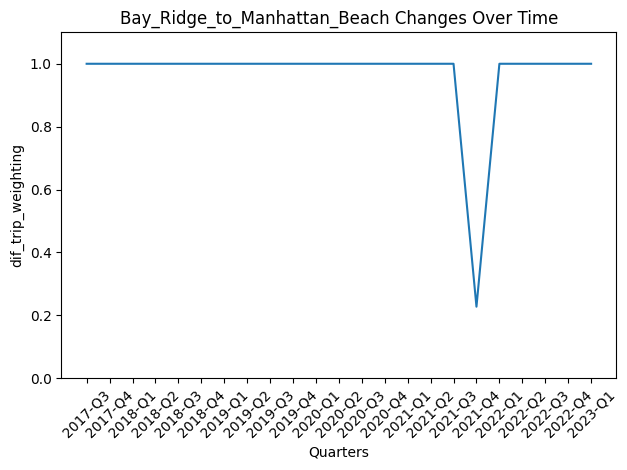

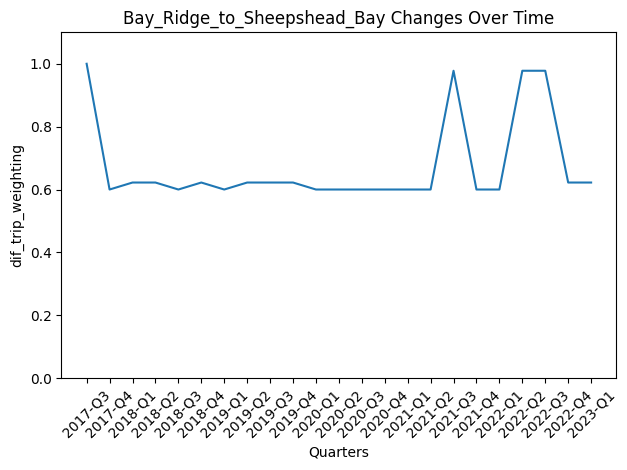

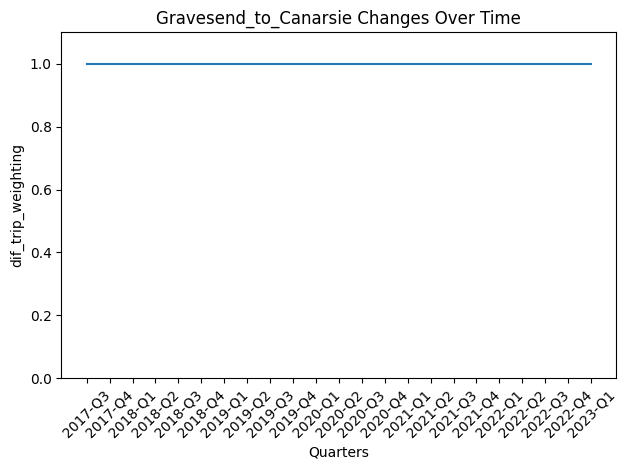

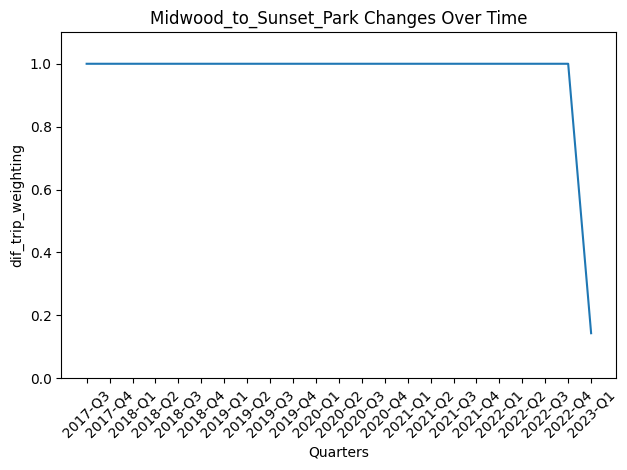

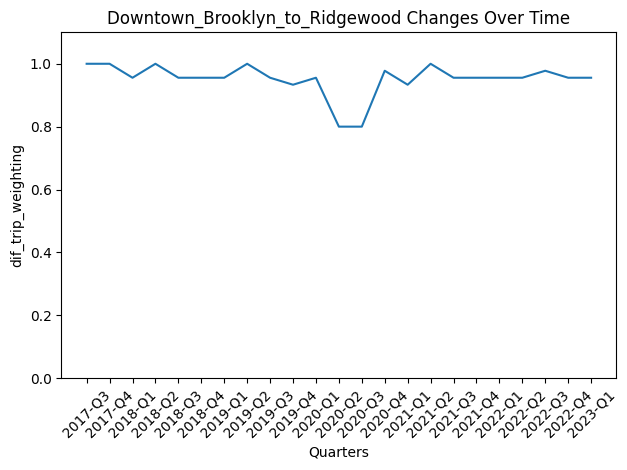

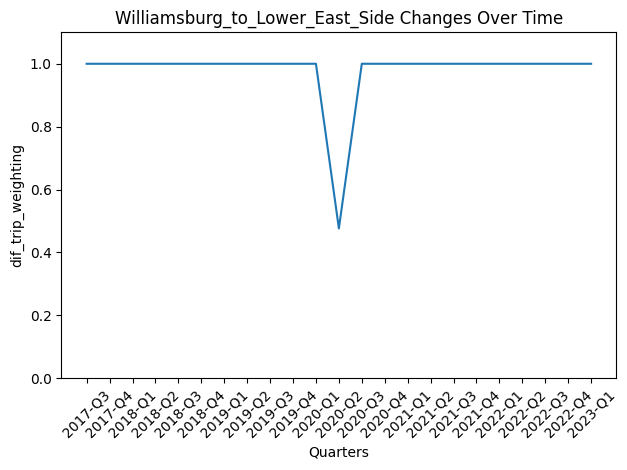

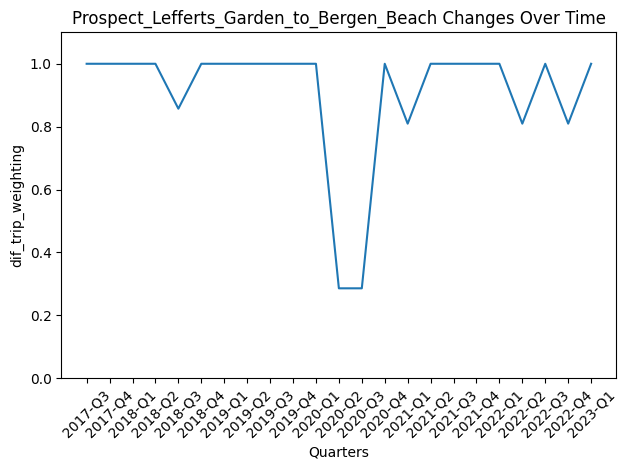

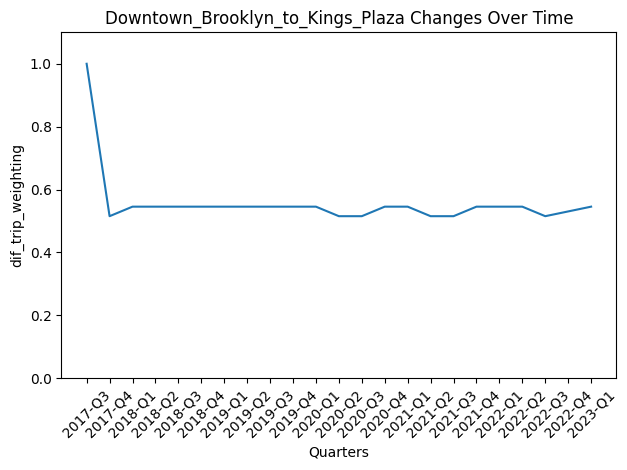

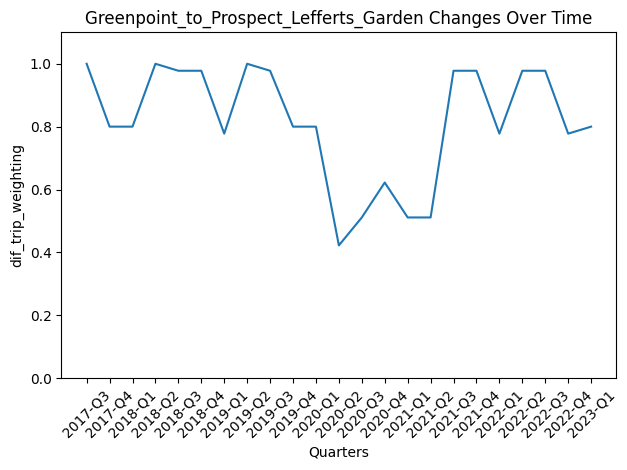

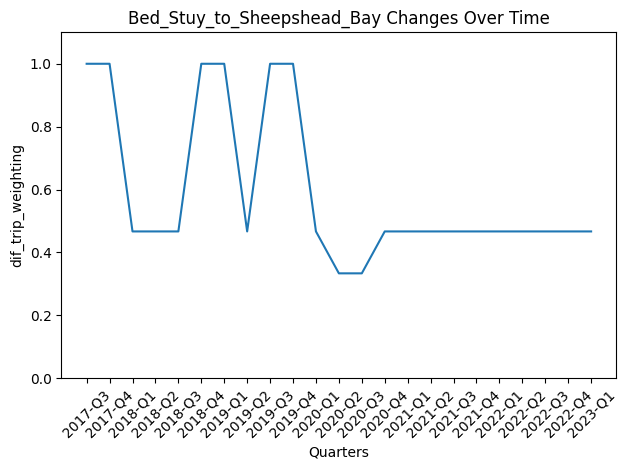

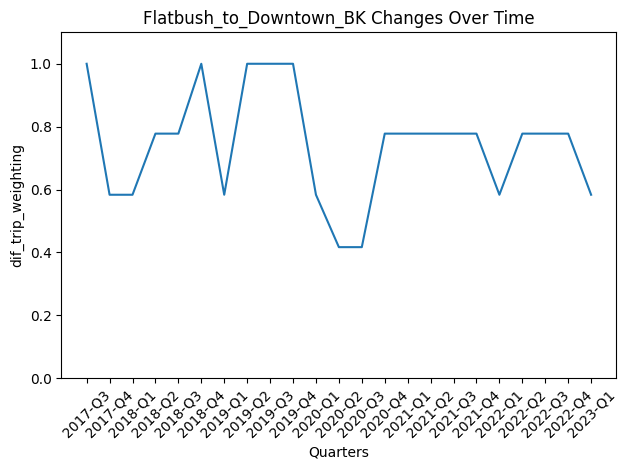

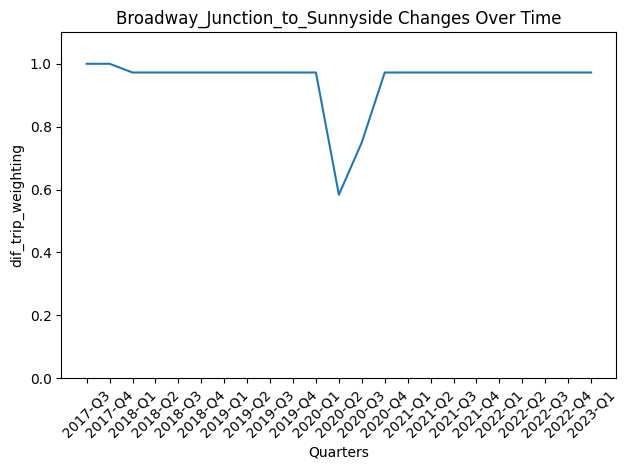

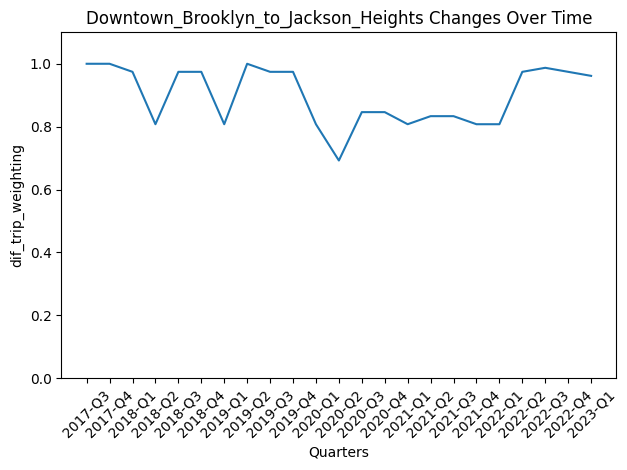

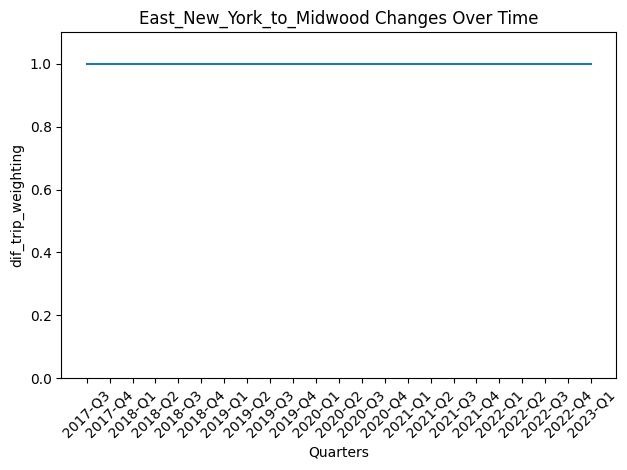

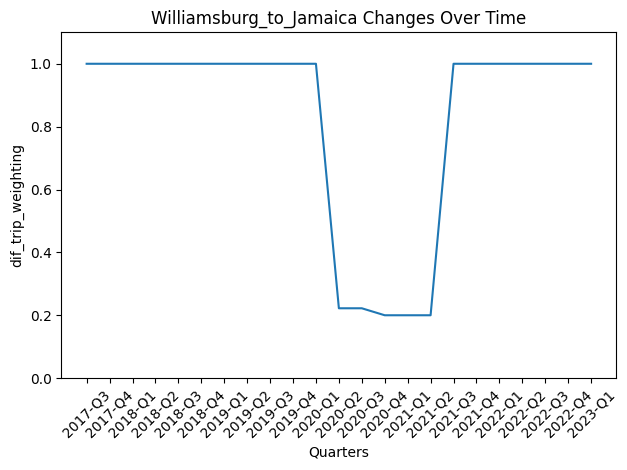

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
# Load your dataframe

# Loop through each route and create a separate plot
for index, row in change_by_q_trip_weight.iterrows():
    route_name = row['routes']
    route_data = row.drop(['routes'])  # Drop the 'routes' column for plotting
    
    plt.figure()  # Create a new figure for each route
    plt.plot(route_data.index, route_data.values)
    
    plt.xlabel('Quarters')
    plt.ylabel('dif_trip_weighting')
    plt.title(f'{route_name} Changes Over Time')
    plt.xticks(rotation=45)
    plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 100
    plt.tight_layout()
    

print("Plots saved successfully.")


Conclusions: things went haywire for a few routes during the pandemic then stabilized. Most of the routes are fairly stable. Some did legitimately change e.g., bed stuy to sheepshead bay changed back and forth then stabilized on a new route. Others vacilated between multiple options before settling on a new one. 12/15 were 90% the same at least once within the last year.

In [57]:
#executing the exact same steps but with fare weight, instead of total number of trips weight
routes_df_by_fair = pd.read_csv(r"C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\15routes_byquarter_bycost.csv")
quarters = routes_df_by_fair['Quarter'].unique()
route_change_by_quarter = []

for q in range(len(quarters)):
    df = route_change_over_time(quarters[q],routes_df_by_fair)
    route_change_by_quarter.append(df)

In [58]:
change_by_q_fare_weight = route_change_by_quarter[0]

# Loop through the remaining dataframes and merge them with the current merged_dataframe
for df in route_change_by_quarter[1:]:
    change_by_q_fare_weight = pd.merge(change_by_q_fare_weight, df, on='routes', how='outer')

change_by_q_fare_weight

,routes,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1
0,Bay_Ridge_to_Manhattan_Beach,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Bay_Ridge_to_Sheepshead_Bay,1.0,1.000000,1.000000,0.800000,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.600000,0.777778,0.977778,0.600000,0.600000,0.800000,0.800000
2,Gravesend_to_Canarsie,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Midwood_to_Sunset_Park,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.285714
4,Downtown_Brooklyn_to_Ridgewood,1.0,0.933333,1.000000,0.933333,0.977778,0.777778,0.933333,1.000000,0.977778,1.000000,1.000000,0.977778,1.000000,1.000000,1.000000,1.000000,0.977778
5,Williamsburg_to_Lower_East_Side,1.0,1.000000,1.000000,1.000000,1.000000,0.476190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Prospect_Lefferts_Garden_to_Bergen_Beach,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.714286,0.714286,0.714286,1.000000,1.000000,1.000000,1.000000
7,Downtown_Brooklyn_to_Kings_Plaza,1.0,0.969697,0.969697,0.984848,0.984848,0.969697,0.969697,0.969697,0.969697,0.969697,0.969697,0.969697,0.969697,0.969697,0.969697,0.969697,0.984848
8,Greenpoint_to_Prospect_Lefferts_Garden,1.0,1.000000,1.000000,1.000000,1.000000,0.444444,0.444444,0.466667,0.444444,0.533333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,Bed_Stuy_to_Sheepshead_Bay,1.0,1.000000,1.000000,1.000000,1.000000,0.755556,0.755556,0.755556,0.755556,1.000000,1.000000,1.000000,1.000000,0.977778,1.000000,0.977778,1.000000


Plots saved successfully.


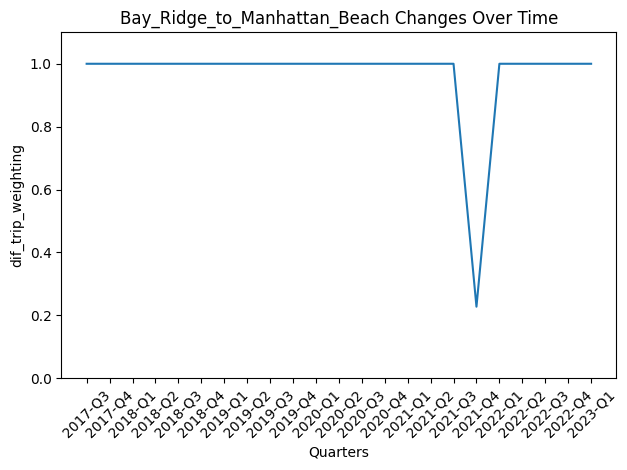

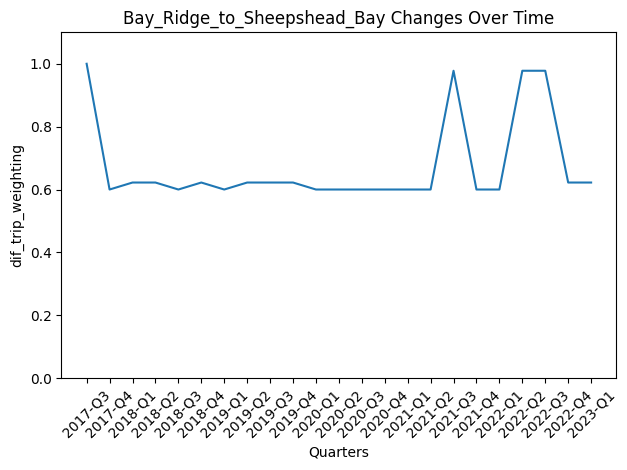

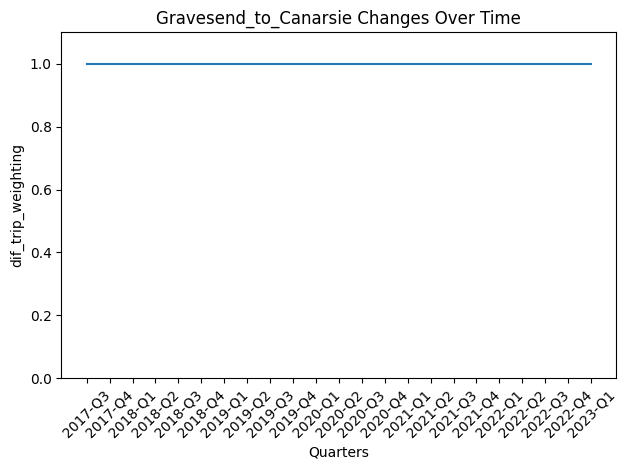

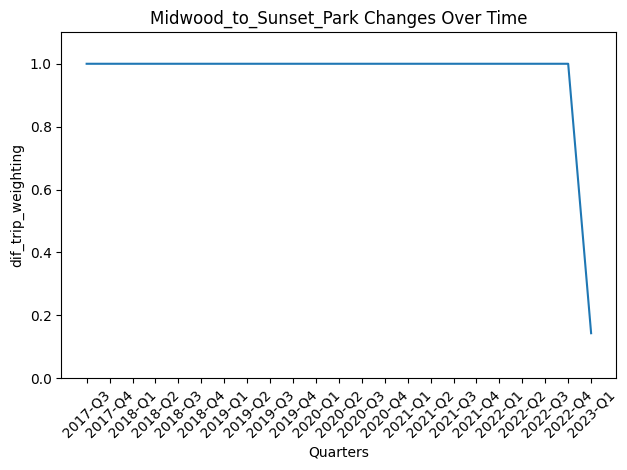

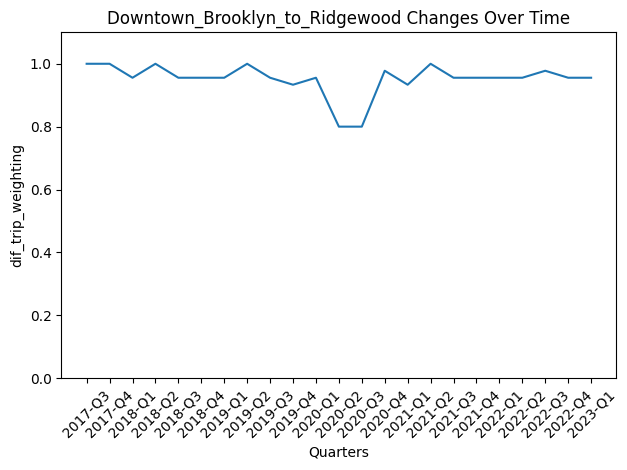

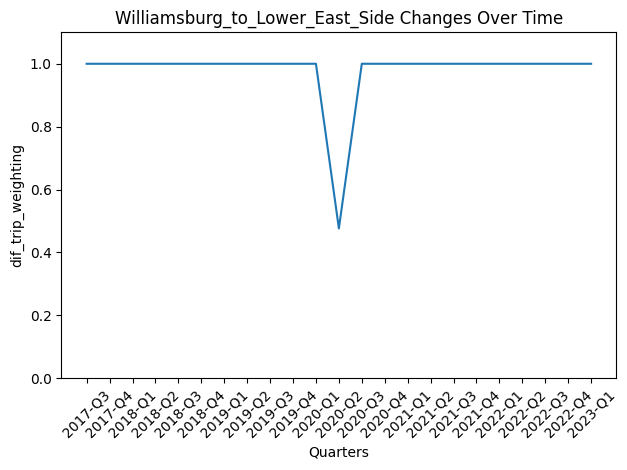

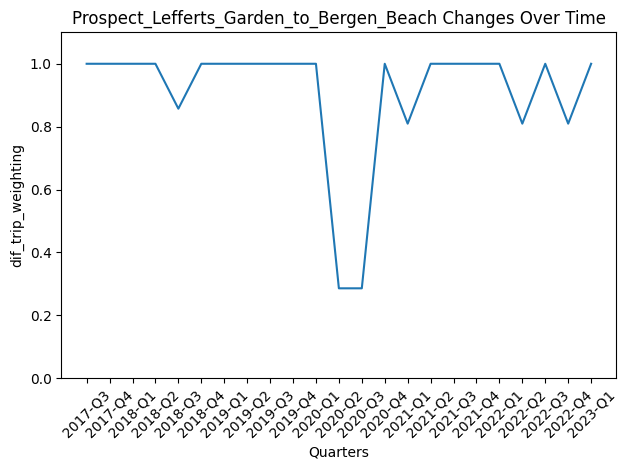

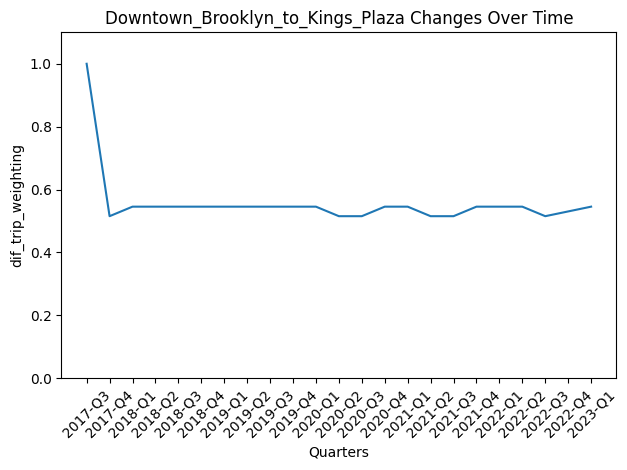

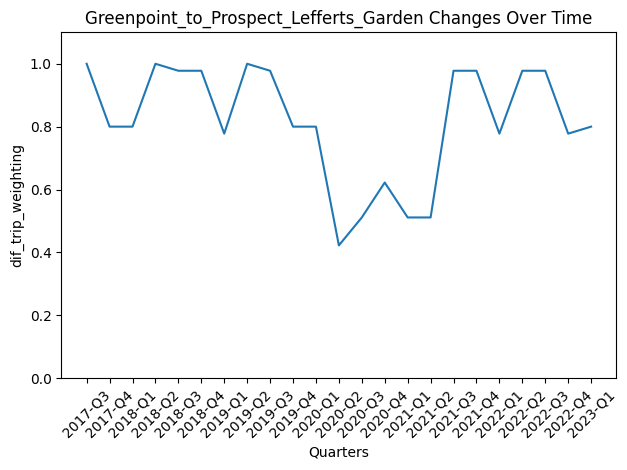

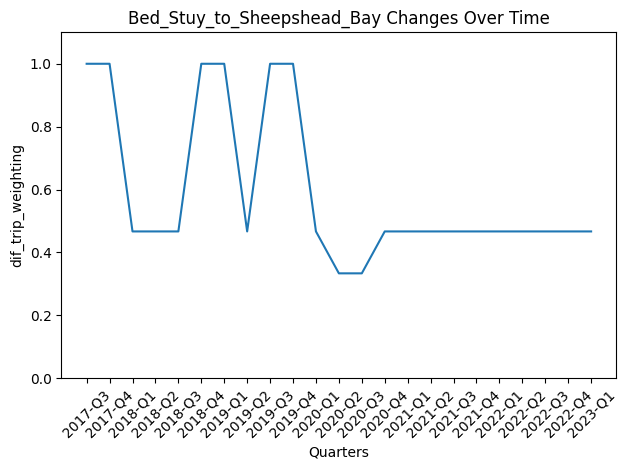

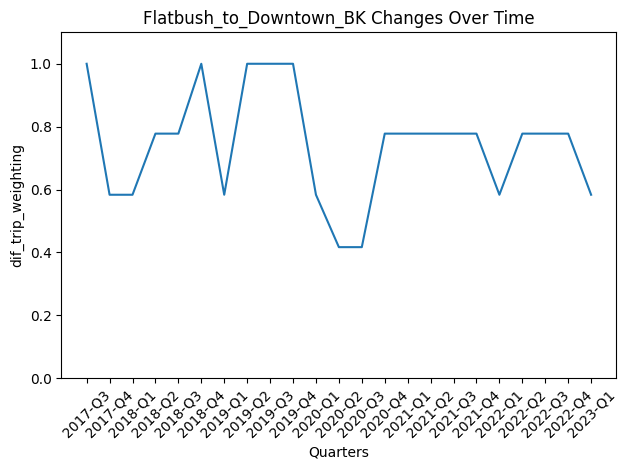

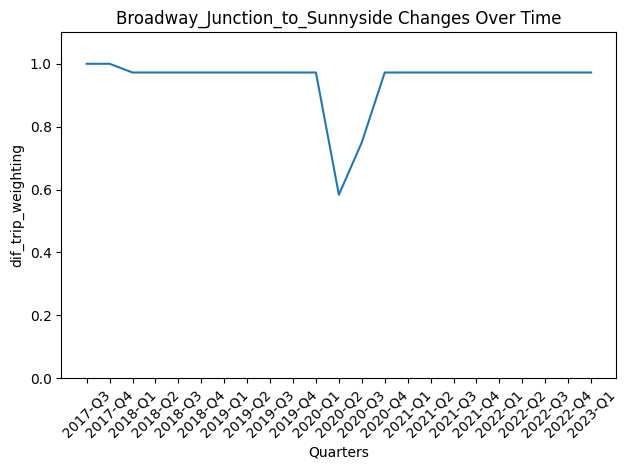

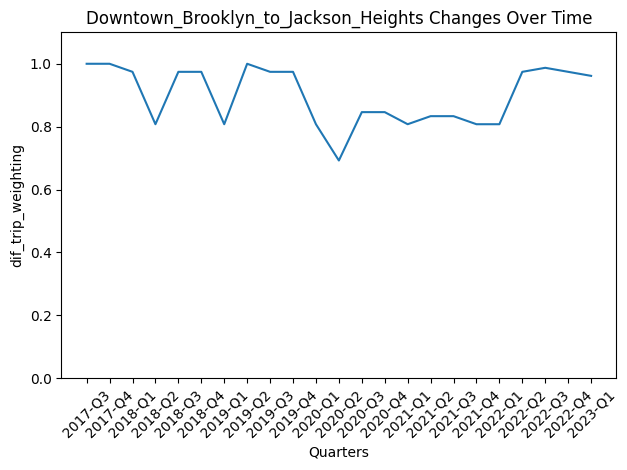

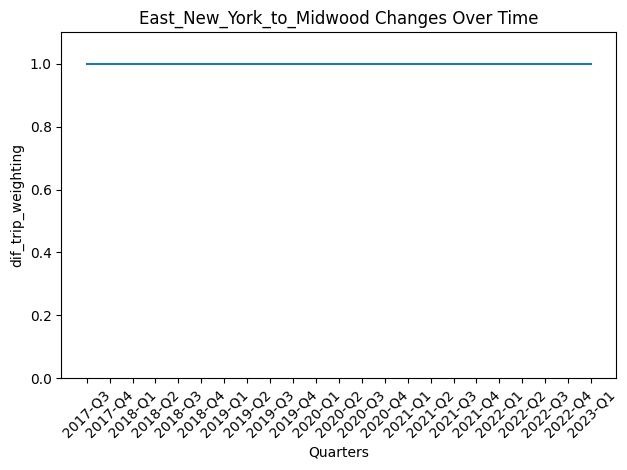

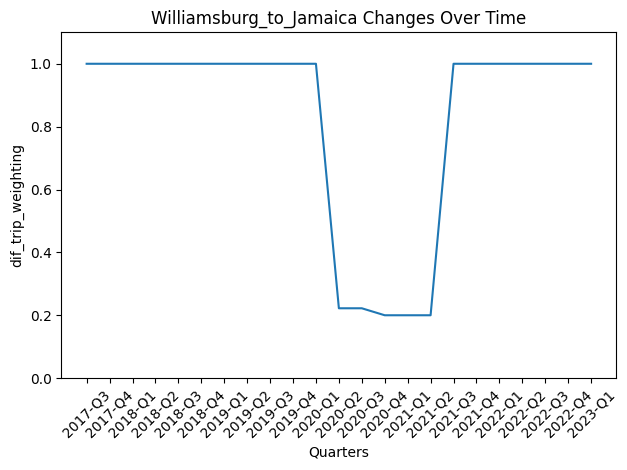

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
# Load your dataframe
# Assuming your dataframe is named 'df'
# Replace this with your actual dataframe loading code

# Loop through each route and create a separate plot
for index, row in change_by_q_trip_weight.iterrows():
    route_name = row['routes']
    route_data = row.drop(['routes'])  # Drop the 'routes' column for plotting
    
    plt.figure()  # Create a new figure for each route
    plt.plot(route_data.index, route_data.values)
    
    plt.xlabel('Quarters')
    plt.ylabel('dif_trip_weighting')
    plt.title(f'{route_name} Changes Over Time')
    plt.xticks(rotation=45)
    plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 100
    plt.tight_layout()
    

print("Plots saved successfully.")

Conclusion: even more stable. 13/15 were>90% in the last year. Otherwise, pretty similar.

Now I an going to compare the two models directly. The below function simply compares the results for the two algorithm versions in any given quarter to each other rather than the first quarter.

In [60]:
def algorithm_comparison(quarter):  

    trip_weight_df = pd.read_csv(r"C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\15routes_byquarter_bytrips.csv")   
    fare_weight_df = pd.read_csv(r"C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\15routes_byquarter_bycost.csv") 

    routes = fare_weight_df['Route'].unique()
    quarters = fare_weight_df['Quarter'].unique()
    path_lists_trip_weight = []
    path_lists_fare_weight = []

    for n in range(len(routes)):
        new_route = trip_weight_df.loc[(trip_weight_df['Route'] == routes[n])&(trip_weight_df['Quarter'] == quarter)] #trip weight for whatever quarter is being measured
        path_list = new_route['PathIDs'].tolist() #take path
        path_lists_trip_weight.append(path_list) #append to a list of paths
        new_route = fare_weight_df.loc[(fare_weight_df['Route'] == routes[n])&(fare_weight_df['Quarter'] == quarter)] #fare weight for whatever quarter is being measured
        path_list = new_route['PathIDs'].tolist() #take path
        path_lists_fare_weight.append(path_list) #append to a list of paths

    trip_weight_covered_routes = []
    path_combo_list = []

#getting the list of tuples (commutes for trip weight)
    for n in range(len(path_lists_trip_weight)):
        path_combinations = []
        for i in range(len(path_lists_trip_weight[n])):
            for j in range(i + 1, len(path_lists_trip_weight[n])):
                path_combinations.append((path_lists_trip_weight[n][i],path_lists_trip_weight[n][j]))
        trip_weight_covered_routes.append(path_combinations)

    fare_weight_covered_routes = []
    path_combo_list = []

#getting the list of tuples (commutes for fare weight)
    for n in range(len(path_lists_fare_weight)):
        path_combinations = []
        for i in range(len(path_lists_fare_weight[n])):
            for j in range(i + 1, len(path_lists_fare_weight[n])):
                path_combinations.append((path_lists_fare_weight[n][i],path_lists_fare_weight[n][j]))
        fare_weight_covered_routes.append(path_combinations)

    intersection_pcts = []
    for n in range(len(routes)):
        trip_route = trip_weight_covered_routes[n]
        fare_route = fare_weight_covered_routes[n]
        res = [ele1 for ele1 in trip_route
            for ele2 in fare_route if ele1 == ele2]
        intersection_pct = len(res)/len(trip_route)
        intersection_pcts.append(intersection_pct)

    tripvsfare = pd.DataFrame({'routes': routes, quarter:intersection_pcts})
    return tripvsfare

In [61]:
quarters = pd.read_csv(r"C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\15routes_byquarter_bycost.csv") 


In [62]:
quarters = quarters['Quarter'].unique() #all quarters for the fare weight, which begins in 2019 Q1

In [63]:
#looping through every quarter
algorithm_comparison_by_quarter = []

for q in range(len(quarters)):
    df = algorithm_comparison(quarters[q])
    algorithm_comparison_by_quarter.append(df)

In [64]:
algo_change = algorithm_comparison_by_quarter[0]

# Loop through the remaining dataframes and merge them with the current merged_dataframe
for df in algorithm_comparison_by_quarter[1:]:
    algo_change = pd.merge(algo_change, df, on='routes', how='outer')

algo_change

,routes,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1
0,Bay_Ridge_to_Manhattan_Beach,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.227273,1.000000,1.000000,1.000000,1.000000,1.000000
1,Bay_Ridge_to_Sheepshead_Bay,0.777778,0.800000,0.800000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,0.800000,1.000000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000
2,Gravesend_to_Canarsie,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Midwood_to_Sunset_Park,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.714286
4,Downtown_Brooklyn_to_Ridgewood,0.977778,0.955556,0.977778,0.933333,1.000000,1.000000,0.777778,0.955556,0.977778,0.977778,0.977778,1.000000,0.977778,0.977778,1.000000,0.977778,1.000000
5,Williamsburg_to_Lower_East_Side,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Prospect_Lefferts_Garden_to_Bergen_Beach,0.285714,0.285714,0.285714,0.285714,0.285714,1.000000,1.000000,0.285714,0.285714,0.285714,0.476190,0.476190,0.476190,0.285714,0.285714,0.285714,0.285714
7,Downtown_Brooklyn_to_Kings_Plaza,1.000000,0.969697,0.969697,0.984848,0.984848,1.000000,1.000000,0.969697,0.969697,1.000000,1.000000,0.969697,0.969697,0.969697,1.000000,0.984848,0.984848
8,Greenpoint_to_Prospect_Lefferts_Garden,0.800000,0.977778,1.000000,0.777778,0.777778,1.000000,0.800000,0.777778,0.800000,1.000000,1.000000,1.000000,0.800000,1.000000,1.000000,0.800000,0.777778
9,Bed_Stuy_to_Sheepshead_Bay,0.466667,0.977778,0.466667,0.466667,1.000000,1.000000,1.000000,0.755556,0.755556,1.000000,0.977778,0.977778,0.977778,1.000000,0.977778,1.000000,0.977778


In [65]:
algo_change['Ones_Count'] = algo_change.iloc[:, 1:-1].eq(1.0).sum(axis=1)
#just seeing how many of the results for any given route was the same

In [66]:
algo_change

,routes,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1,Ones_Count
0,Bay_Ridge_to_Manhattan_Beach,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.227273,1.000000,1.000000,1.000000,1.000000,1.000000,15
1,Bay_Ridge_to_Sheepshead_Bay,0.777778,0.800000,0.800000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,0.800000,1.000000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,10
2,Gravesend_to_Canarsie,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16
3,Midwood_to_Sunset_Park,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.714286,16
4,Downtown_Brooklyn_to_Ridgewood,0.977778,0.955556,0.977778,0.933333,1.000000,1.000000,0.777778,0.955556,0.977778,0.977778,0.977778,1.000000,0.977778,0.977778,1.000000,0.977778,1.000000,4
5,Williamsburg_to_Lower_East_Side,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16
6,Prospect_Lefferts_Garden_to_Bergen_Beach,0.285714,0.285714,0.285714,0.285714,0.285714,1.000000,1.000000,0.285714,0.285714,0.285714,0.476190,0.476190,0.476190,0.285714,0.285714,0.285714,0.285714,2
7,Downtown_Brooklyn_to_Kings_Plaza,1.000000,0.969697,0.969697,0.984848,0.984848,1.000000,1.000000,0.969697,0.969697,1.000000,1.000000,0.969697,0.969697,0.969697,1.000000,0.984848,0.984848,6
8,Greenpoint_to_Prospect_Lefferts_Garden,0.800000,0.977778,1.000000,0.777778,0.777778,1.000000,0.800000,0.777778,0.800000,1.000000,1.000000,1.000000,0.800000,1.000000,1.000000,0.800000,0.777778,7
9,Bed_Stuy_to_Sheepshead_Bay,0.466667,0.977778,0.466667,0.466667,1.000000,1.000000,1.000000,0.755556,0.755556,1.000000,0.977778,0.977778,0.977778,1.000000,0.977778,1.000000,0.977778,6


In [67]:
print(algo_change.iloc[:,-1].sum())
print(17*15)


147
255


In [68]:
147/255 #58% of routes were exactly the same in both algos

0.5764705882352941

In [69]:
algo_change['more than 90%'] = (algo_change.iloc[:, 1:-1] > 0.9).sum(axis=1)
#same question, but 90% the same

In [70]:
print(algo_change.iloc[:,-1].sum())
print(17*15)


202
255


In [71]:
202/255 #79% of routes measured weere >=90% the same


0.792156862745098

In [72]:
algo_change['more than 80%'] = (algo_change.iloc[:, 1:-1] > 0.9).sum(axis=1)
#same question, but 80% the same

In [73]:
print(algo_change.iloc[:,-1].sum())
print(17*15)

217
255


In [74]:
217/255 #85% of routes measured weere >=80% the same

0.8509803921568627

In [75]:
algo_change.columns

Index(['routes', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1',
       '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3',
       '2021-Q4', '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1',
       'Ones_Count', 'more than 90%', 'more than 80%'],
      dtype='object')

In [76]:
desired_columns = ['routes', 'Ones_Count', 'more than 90%', 'more than 80%']
selected_data = algo_change[desired_columns]
selected_data
#just taking a look at a summary

,routes,Ones_Count,more than 90%,more than 80%
0,Bay_Ridge_to_Manhattan_Beach,15,16,17
1,Bay_Ridge_to_Sheepshead_Bay,10,11,12
2,Gravesend_to_Canarsie,16,17,18
3,Midwood_to_Sunset_Park,16,16,17
4,Downtown_Brooklyn_to_Ridgewood,4,16,17
5,Williamsburg_to_Lower_East_Side,16,17,18
6,Prospect_Lefferts_Garden_to_Bergen_Beach,2,2,3
7,Downtown_Brooklyn_to_Kings_Plaza,6,17,18
8,Greenpoint_to_Prospect_Lefferts_Garden,7,8,9
9,Bed_Stuy_to_Sheepshead_Bay,6,12,13


In [77]:
desired_columns = ['routes', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1',
       '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3',
       '2021-Q4', '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1']
selected_data_2 = algo_change[desired_columns]

In [111]:
# Reshape the data so that I can graph this as a histogram
df_flat = selected_data_2.melt(id_vars=['routes'], var_name='quarter', value_name='value')


In [112]:
df_flat

,routes,quarter,value
0,Bay_Ridge_to_Manhattan_Beach,2019-Q1,1.000000
1,Bay_Ridge_to_Sheepshead_Bay,2019-Q1,0.777778
2,Gravesend_to_Canarsie,2019-Q1,1.000000
3,Midwood_to_Sunset_Park,2019-Q1,1.000000
4,Downtown_Brooklyn_to_Ridgewood,2019-Q1,0.977778
...,...,...,...
250,Flatbush_to_Downtown_BK,2023-Q1,0.777778
251,Broadway_Junction_to_Sunnyside,2023-Q1,0.944444
252,Downtown_Brooklyn_to_Jackson_Heights,2023-Q1,0.987179
253,East_New_York_to_Midwood,2023-Q1,1.000000


Below is a histogram showing the results of percentage relation of the two algorithms, given that they're fed the same quarter but different results. Basically: they most often come up with the same or very similar results.

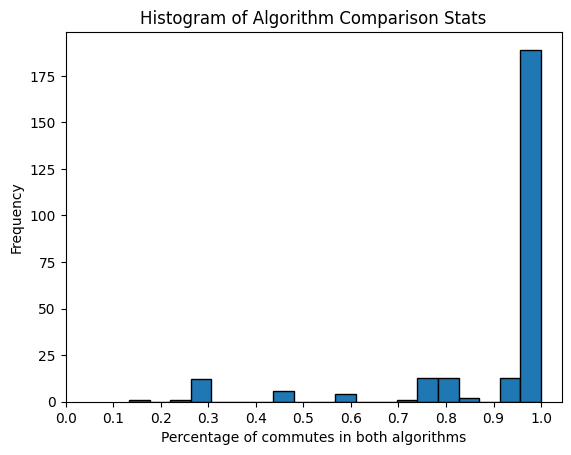

In [123]:
import matplotlib.pyplot as plt

plt.hist(df_flat['value'], bins=20, edgecolor='black')
plt.xlabel('Percentage of commutes in both algorithms')
plt.ylabel('Frequency')
plt.title('Histogram of Algorithm Comparison Stats')
plt.xticks([i/10 for i in range(11)]) 

plt.show()
